In [1]:
from keras import models, layers

Using TensorFlow backend.


In [2]:
model = models.Sequential()

model.add(layers.Embedding(1000,64))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
Total params: 64,000
Trainable params: 64,000
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 300

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)



In [4]:
print(x_train.shape)
print(x_test.shape)

print(x_train[0])

(25000, 300)
(25000, 300)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    1   14
   22   16   43  530  973 1622 1385   65  458 4468   66 3941    4  173
   36  256    5   25  100   43  838  112   50  670    2    9   35  480
  284    5  150    4  172  112  167    2  336  385   39    4  172 4536
 1111   17  546   38   13  447    4  192   50   16    6  147 2025   19
   14   22    4 1920 4613  469    4   22   71   87   12   16   43  530
   38   76   15   13 1247    4   22   17  515   17   12   16  626   18
    2    5   62  386   12    8  316    8  106    5    4 2223 5244   16
  480   66 3785   33    4  130   12   16   38  619 

In [5]:
model = models.Sequential()

model.add(layers.Embedding(10000, 8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

history = model.fit(
    x_train, y_train,
    epochs=12,
    batch_size=32,
    validation_split=0.2
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2401      
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/12
20000/20000 [==============================] - 1s 59us/step - loss: 0.5899 - acc: 0.6975 - val_loss: 0.3958 - val_acc: 0.8448
Epoch 2/12
20000/20000 [==============================] - 1s 48us/step - loss: 0.3030 - acc: 0.8836 - val_loss: 0.2890 - val_acc: 0.8838
Epoch 3/12
20000/20000 [==============================] - 1s 47us/step - loss: 

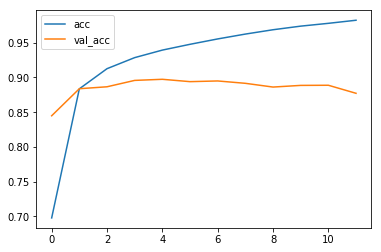

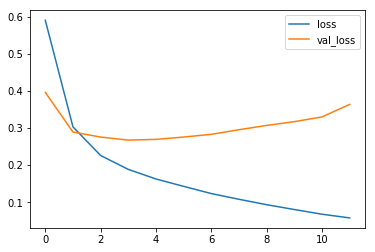

In [8]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history["acc"], label="acc")
    plt.plot(history["val_acc"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

plot_history(history.history)

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

25000/25000 [==============================] - 0s 14us/step
3.481213818817139 0.4966
